# Understanding Fit

If we take something like a decision tree. The more depth we add to our decision tree the more leaf nodes we generate <br/>
and more specificity we add to our model. However, this can sometimes result in overfitting. Typically, there is a <br/>
point at which we get optimal performance. This occurs when the validation curve reached a minima. 
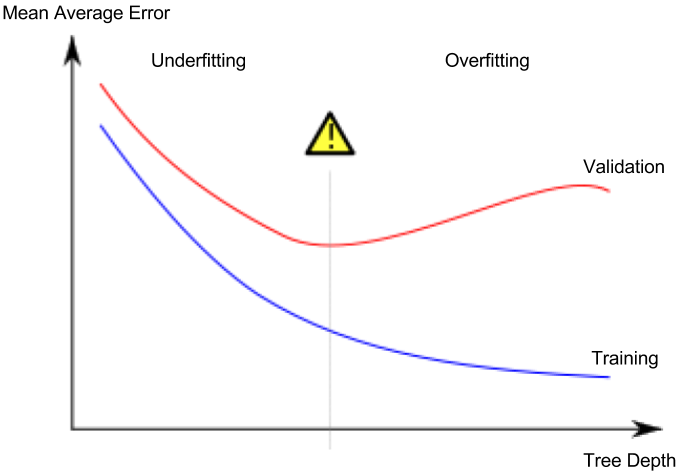
<br/>
We can determine an optimal depth by running a code which creates numerous trees and tries varies depths, computing the mean absolute error at the end of each itteration. 

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

Once we finish we can bring the list of error values and assess which range we should continue investigating. If we wanted to, we could plot this using **MatPlotLib** and visually see our data. 

In [ ]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    
# Can alternatively be written as the following which is super clean and concise 
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
# The best scoore can then be found by getting the min value 
best_tree_size = min(scores, key=scores.get)

Once we determine the optimal depth size, we no longer need to seperate the data. So before deployment, merge the datasets together and retrain the model for a final iteration, one which should be the best possible model using the given parameters. 